# Teen Market Segmentation Using K-means Clustering<a href="#Teen-Market-Segmentation-Using-K-means-Clustering" class="anchor-link">¶</a>

Interacting with friends on a social networking service (SNS) has become
a rite of passage for teenagers around the world. The many millions of
teenage consumers using such sites have attracted the attention of
marketers struggling to find an edge in an increasingly competitive
market. One way to gain this edge is to identify segments of teenagers
who share similar tastes, so that clients can avoid targeting
advertisements to teens with no interest in the product being sold. For
instance, sporting apparel is likely to be a difficult sell to teens
with no interest in sports.

## Dataset Information<a href="#Dataset-Information" class="anchor-link">¶</a>

The dataset represents a random sample of 30,000 U.S. high school
students who had profiles on a well-known SNS in 2006. To protect the
users’ anonymity, the SNS will remain unnamed. The data was sampled
evenly across four high school graduation years (2006 through 2009)
representing the senior, junior, sophomore, and freshman classes at the
time of data collection The dataset contatins 40 variables like: gender,
age, friends, basketball, football, soccer, softball,
volleyball,swimming, cute, sexy, kissed, sports, rock, god, church,
bible, hair, mall, clothes, hollister, drugs etc whcih shows their
interests. The final dataset indicates, for each person, how many times
each word appeared in the person’s SNS profile

## Load Libraries<a href="#Load-Libraries" class="anchor-link">¶</a>

In \[1\]:

    # Importing Packages
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns

# Load Data<a href="#Load-Data" class="anchor-link">¶</a>

In \[2\]:

    pd.set_option('display.max_columns',None)
    data = pd.read_csv("C:/Users/user/Projects/Datasets/snsdata.csv")
    data.head()

Out\[2\]:

|     | gradyear | gender | age    | friends | basketball | football | soccer | softball | volleyball | swimming | cheerleading | baseball | tennis | sports | cute | sex | sexy | hot | kissed | dance | band | marching | music | rock | god | church | jesus | bible | hair | dress | blonde | mall | shopping | clothes | hollister | abercrombie | die | death | drunk | drugs |
|-----|----------|--------|--------|---------|------------|----------|--------|----------|------------|----------|--------------|----------|--------|--------|------|-----|------|-----|--------|-------|------|----------|-------|------|-----|--------|-------|-------|------|-------|--------|------|----------|---------|-----------|-------------|-----|-------|-------|-------|
| 0   | 2006     | M      | 18.982 | 7       | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 0   | 0    | 0   | 0      | 1     | 0    | 0        | 0     | 0    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     |
| 1   | 2006     | F      | 18.801 | 0       | 0          | 1        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 1    | 0   | 0    | 0   | 0      | 0     | 0    | 0        | 2     | 2    | 1   | 0      | 0     | 0     | 6    | 4     | 0      | 1    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     |
| 2   | 2006     | M      | 18.335 | 69      | 0          | 1        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 0   | 0    | 0   | 0      | 0     | 2    | 0        | 1     | 0    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 1     | 0     | 0     |
| 3   | 2006     | F      | 18.875 | 0       | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 1    | 0   | 0    | 0   | 0      | 0     | 0    | 0        | 0     | 1    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     |
| 4   | 2006     | NaN    | 18.995 | 10      | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 1   | 0    | 0   | 5      | 1     | 1    | 0        | 3     | 0    | 1   | 0      | 0     | 0     | 1    | 0     | 0      | 0    | 2        | 0       | 0         | 0           | 0   | 0     | 1     | 1     |

## Summary Statistics<a href="#Summary-Statistics" class="anchor-link">¶</a>

### Summary Statistics of Numerical Variables<a href="#Summary-Statistics-of-Numerical-Variables" class="anchor-link">¶</a>

In \[3\]:

    data.describe()

Out\[3\]:

|       | gradyear     | age          | friends      | basketball   | football     | soccer       | softball     | volleyball   | swimming    | cheerleading | baseball     | tennis       | sports       | cute         | sex          | sexy         | hot          | kissed       | dance        | band         | marching     | music        | rock         | god          | church       | jesus        | bible        | hair         | dress        | blonde       | mall         | shopping     | clothes     | hollister    | abercrombie  | die          | death        | drunk        | drugs        |
|-------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|--------------|-------------|--------------|--------------|--------------|--------------|--------------|--------------|
| count | 30000.000000 | 24914.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.00000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.00000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 | 30000.000000 |
| mean  | 2007.500000  | 17.993950    | 30.179467    | 0.267333     | 0.252300     | 0.222767     | 0.161200     | 0.143133     | 0.13440     | 0.106633     | 0.104933     | 0.087333     | 0.139967     | 0.322867     | 0.209400     | 0.141200     | 0.126600     | 0.103200     | 0.425167     | 0.299600     | 0.040600     | 0.737833     | 0.243333     | 0.465300     | 0.248167     | 0.112067     | 0.021333     | 0.422567     | 0.110967     | 0.098933     | 0.257367     | 0.353000     | 0.14850     | 0.069867     | 0.051167     | 0.184100     | 0.114233     | 0.087967     | 0.060433     |
| std   | 1.118053     | 7.858054     | 36.530877    | 0.804708     | 0.705357     | 0.917226     | 0.739707     | 0.639943     | 0.51699     | 0.514333     | 0.521726     | 0.516961     | 0.471080     | 0.802441     | 1.123504     | 0.528209     | 0.479145     | 0.509338     | 1.162574     | 1.118786     | 0.287091     | 1.252366     | 0.720375     | 1.343226     | 0.834028     | 0.581709     | 0.204645     | 1.097958     | 0.449436     | 1.942319     | 0.695758     | 0.724391     | 0.47264     | 0.346779     | 0.279555     | 0.624516     | 0.436796     | 0.399125     | 0.345522     |
| min   | 2006.000000  | 3.086000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     |
| 25%   | 2006.750000  | 16.312000    | 3.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     |
| 50%   | 2007.500000  | 17.287000    | 20.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     |
| 75%   | 2008.250000  | 18.259000    | 44.000000    | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 1.000000     | 0.000000     | 1.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 1.000000     | 0.00000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     | 0.000000     |
| max   | 2009.000000  | 106.927000   | 830.000000   | 24.000000    | 15.000000    | 27.000000    | 17.000000    | 14.000000    | 31.00000    | 9.000000     | 16.000000    | 15.000000    | 12.000000    | 18.000000    | 114.000000   | 18.000000    | 10.000000    | 26.000000    | 30.000000    | 66.000000    | 11.000000    | 64.000000    | 21.000000    | 79.000000    | 44.000000    | 30.000000    | 11.000000    | 37.000000    | 9.000000     | 327.000000   | 12.000000    | 11.000000    | 8.00000     | 9.000000     | 8.000000     | 22.000000    | 14.000000    | 8.000000     | 16.000000    |

### Summary Statistics of Categorical Variables<a href="#Summary-Statistics-of-Categorical-Variables" class="anchor-link">¶</a>

In \[4\]:

    data.describe(include='object')

Out\[4\]:

|        | gender |
|--------|--------|
| count  | 27276  |
| unique | 2      |
| top    | F      |
| freq   | 22054  |

## Treating Missing Values<a href="#Treating-Missing-Values" class="anchor-link">¶</a>

In \[5\]:

    data.isnull().sum()

Out\[5\]:

    gradyear           0
    gender          2724
    age             5086
    friends            0
    basketball         0
    football           0
    soccer             0
    softball           0
    volleyball         0
    swimming           0
    cheerleading       0
    baseball           0
    tennis             0
    sports             0
    cute               0
    sex                0
    sexy               0
    hot                0
    kissed             0
    dance              0
    band               0
    marching           0
    music              0
    rock               0
    god                0
    church             0
    jesus              0
    bible              0
    hair               0
    dress              0
    blonde             0
    mall               0
    shopping           0
    clothes            0
    hollister          0
    abercrombie        0
    die                0
    death              0
    drunk              0
    drugs              0
    dtype: int64

A total of 5,086 records have missing ages. Also concerning is the fact
that the minimum and maximum values seem to be unreasonable; it is
unlikely that a 3 year old or a 106 year old is attending high school.

Let's have a look at the number of male and female candidates in our
dataset

In \[6\]:

    data['gender'].value_counts()

Out\[6\]:

    F    22054
    M     5222
    Name: gender, dtype: int64

Let's have a look at the number of male, female and msiing values

In \[7\]:

    data['gender'].value_counts(dropna = False)

Out\[7\]:

    F      22054
    M       5222
    NaN     2724
    Name: gender, dtype: int64

There are 22054 female, 5222 male teen students and 2724 missing values

Now we are going to fill all the null values in gender column with “No
Gender”

In \[10\]:

    data['gender'].fillna('not disclosed', inplace = True)

In \[8\]:

    data['gender'].isnull().sum()

Out\[8\]:

    2724

Also, the age cloumn has 5086 missing values. One way to deal with these
missing values would be to fill the missing values with the average age
of each graduation year

In \[9\]:

    data.groupby('gradyear')['age'].mean()

Out\[9\]:

    gradyear
    2006    19.137241
    2007    18.391459
    2008    17.523867
    2009    16.876025
    Name: age, dtype: float64

From the above summary we can observe that the mean age differs by
roughly one year per change in graduation year. This is not at all
surprising, but a helpful finding for confirming our data is reasonable

We now fill the missing values for each graduation year with the mean
that we got as above

In \[11\]:

    data['age'] = data.groupby('gradyear').transform(lambda x : x.fillna(x.mean()))

In \[12\]:

    data['age'].isnull().sum()

Out\[12\]:

    0

We don't have any missing values in the 'age' column

In \[13\]:

    data.isnull().sum()

Out\[13\]:

    gradyear        0
    gender          0
    age             0
    friends         0
    basketball      0
    football        0
    soccer          0
    softball        0
    volleyball      0
    swimming        0
    cheerleading    0
    baseball        0
    tennis          0
    sports          0
    cute            0
    sex             0
    sexy            0
    hot             0
    kissed          0
    dance           0
    band            0
    marching        0
    music           0
    rock            0
    god             0
    church          0
    jesus           0
    bible           0
    hair            0
    dress           0
    blonde          0
    mall            0
    shopping        0
    clothes         0
    hollister       0
    abercrombie     0
    die             0
    death           0
    drunk           0
    drugs           0
    dtype: int64

From the above summary we can see that there are no missing values in
the dataset

## Treating Outliers<a href="#Treating-Outliers" class="anchor-link">¶</a>

The original age range contains value from 3 - 106, which is unrealistic
because student at age of 3 or 106 would not attend high school. A
reasonable age range for people attending high school will be the age
range between 13 to 21. The rest should be treated as outliers keeping
the age of student going to high school in mind. Let's detect the
outliers using a box plot below

In \[14\]:

    sns.boxplot(data['age'])

Out\[14\]:

    <matplotlib.axes._subplots.AxesSubplot at 0xa187630>

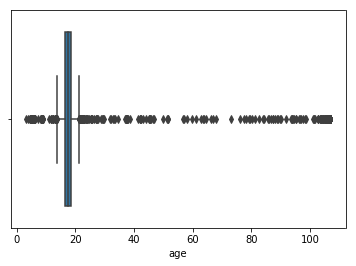

In \[16\]:

    q1 = data['age'].quantile(0.25)
    q3 = data['age'].quantile(0.75)
    iqr = q3-q1

In \[17\]:

    print(iqr)

    1.887459224069687

In \[18\]:

    df = data[(data['age'] > (q1 - 1.5*iqr)) & (data['age'] < (q3 + 1.5*iqr))]

In \[19\]:

    df['age'].describe()

Out\[19\]:

    count    29633.000000
    mean        17.377469
    std          1.147764
    min         13.719000
    25%         16.501000
    50%         17.426000
    75%         18.387000
    max         21.158000
    Name: age, dtype: float64

From the above summary we can observe that after treating the outliers
the mininmum age is 13.719000 and the maximum age is 21.158000

In \[20\]:

    df.shape

Out\[20\]:

    (29633, 40)

In \[21\]:

    sns.boxplot(df['age'])

Out\[21\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x9b51ba8>

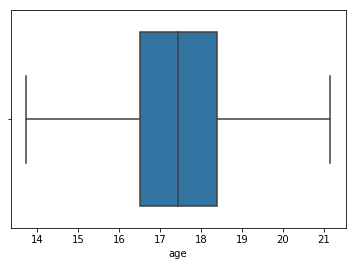

From the above boxplot we observe that there are no outliers in the age
column

## Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

A common practice employed prior to any analysis using distance
calculations is to normalize or z-score standardize the features so that
each utilizes the same range. By doing so, you can avoid a problem in
which some features come to dominate solely because they have a larger
range of values than the others.  
The process of z-score standardization rescales features so that they
have a mean of zero and a standard deviation of one. This transformation
changes the interpretation of the data in a way that may be useful here.
Specifically, if someone mentions Swimming three times on their profile,
without additional information, we have no idea whether this implies
they like Swimming more or less than their peers. On the other hand, if
the z-score is three, we know that that they mentioned Swimming many
more times than the average teenager.

In \[30\]:

    names = df.columns[5:40]
    scaled_feature = data.copy()
    names

Out\[30\]:

    Index(['football', 'soccer', 'softball', 'volleyball', 'swimming',
           'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy',
           'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god',
           'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall',
           'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death',
           'drunk', 'drugs'],
          dtype='object')

In \[31\]:

    features = scaled_feature[names]

In \[33\]:

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(features.values)

    C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
      warnings.warn(msg, DataConversionWarning)

In \[34\]:

    features = scaler.transform(features.values)

    C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
      warnings.warn(msg, DataConversionWarning)

In \[35\]:

    scaled_feature[names] = features
    scaled_feature.head()

Out\[35\]:

|     | gradyear | gender        | age    | friends | basketball | football  | soccer    | softball  | volleyball | swimming  | cheerleading | baseball  | tennis    | sports    | cute      | sex       | sexy      | hot       | kissed    | dance     | band      | marching  | music     | rock      | god       | church    | jesus     | bible     | hair      | dress     | blonde    | mall      | shopping  | clothes   | hollister | abercrombie | die       | death     | drunk     | drugs     |
|-----|----------|---------------|--------|---------|------------|-----------|-----------|-----------|------------|-----------|--------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-------------|-----------|-----------|-----------|-----------|
| 0   | 2006     | M             | 18.982 | 7       | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | -0.186384 | -0.267323 | -0.264225 | -0.202619 | 0.494457  | -0.267795 | -0.141421 | -0.589161 | -0.337793 | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 1   | 2006     | F             | 18.801 | 0       | 0          | 1.060049  | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | 0.843856  | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | -0.267795 | -0.141421 | 1.007842  | 2.438587  | 0.398078  | -0.297557 | -0.192654 | -0.104247 | 5.079910  | 8.653277  | -0.050937 | 1.067392  | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 2   | 2006     | M             | 18.335 | 69      | 0          | 1.060049  | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | 1.519887  | -0.141421 | 0.209341  | -0.337793 | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | 2.027908  | -0.220403 | -0.174908 |
| 3   | 2006     | F             | 18.875 | 0       | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | 0.843856  | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | -0.267795 | -0.141421 | -0.589161 | 1.050397  | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 4   | 2006     | not disclosed | 18.995 | 10      | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | 0.703703  | -0.267323 | -0.264225 | 9.614211  | 0.494457  | 0.626046  | -0.141421 | 1.806344  | -0.337793 | 0.398078  | -0.297557 | -0.192654 | -0.104247 | 0.525925  | -0.246906 | -0.050937 | -0.369915 | 2.273673  | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | 2.285122  | 2.719316  |

## Convert object variable to numeric<a href="#Convert-object-variable-to-numeric" class="anchor-link">¶</a>

In \[36\]:

    def gender_to_numeric(x):
        if x=='M':
            return 1
        if x=='F':
            return 2
        if x=='not disclosed':
            return 3

In \[37\]:

    scaled_feature['gender'] = scaled_feature['gender'].apply(gender_to_numeric)
    scaled_feature['gender'].head()

Out\[37\]:

    0    1
    1    2
    2    1
    3    2
    4    3
    Name: gender, dtype: int64

### Checking the transformed values<a href="#Checking-the-transformed-values" class="anchor-link">¶</a>

In \[38\]:

    scaled_feature.head()

Out\[38\]:

|     | gradyear | gender | age    | friends | basketball | football  | soccer    | softball  | volleyball | swimming  | cheerleading | baseball  | tennis    | sports    | cute      | sex       | sexy      | hot       | kissed    | dance     | band      | marching  | music     | rock      | god       | church    | jesus     | bible     | hair      | dress     | blonde    | mall      | shopping  | clothes   | hollister | abercrombie | die       | death     | drunk     | drugs     |
|-----|----------|--------|--------|---------|------------|-----------|-----------|-----------|------------|-----------|--------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-------------|-----------|-----------|-----------|-----------|
| 0   | 2006     | 1      | 18.982 | 7       | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | -0.186384 | -0.267323 | -0.264225 | -0.202619 | 0.494457  | -0.267795 | -0.141421 | -0.589161 | -0.337793 | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 1   | 2006     | 2      | 18.801 | 0       | 0          | 1.060049  | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | 0.843856  | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | -0.267795 | -0.141421 | 1.007842  | 2.438587  | 0.398078  | -0.297557 | -0.192654 | -0.104247 | 5.079910  | 8.653277  | -0.050937 | 1.067392  | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 2   | 2006     | 1      | 18.335 | 69      | 0          | 1.060049  | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | 1.519887  | -0.141421 | 0.209341  | -0.337793 | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | 2.027908  | -0.220403 | -0.174908 |
| 3   | 2006     | 2      | 18.875 | 0       | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | 0.843856  | -0.186384 | -0.267323 | -0.264225 | -0.202619 | -0.365718 | -0.267795 | -0.141421 | -0.589161 | 1.050397  | -0.346411 | -0.297557 | -0.192654 | -0.104247 | -0.384873 | -0.246906 | -0.050937 | -0.369915 | -0.487314 | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | -0.220403 | -0.174908 |
| 4   | 2006     | 3      | 18.995 | 10      | 0          | -0.357697 | -0.242874 | -0.217928 | -0.22367   | -0.259971 | -0.207327    | -0.201131 | -0.168939 | -0.297123 | -0.402362 | 0.703703  | -0.267323 | -0.264225 | 9.614211  | 0.494457  | 0.626046  | -0.141421 | 1.806344  | -0.337793 | 0.398078  | -0.297557 | -0.192654 | -0.104247 | 0.525925  | -0.246906 | -0.050937 | -0.369915 | 2.273673  | -0.314198 | -0.201476 | -0.183032   | -0.294793 | -0.261530 | 2.285122  | 2.719316  |

## Building the K-means model<a href="#Building-the-K-means-model" class="anchor-link">¶</a>

In \[40\]:

    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

In \[41\]:

    model = kmeans.fit(scaled_feature)

## Elbow Method<a href="#Elbow-Method" class="anchor-link">¶</a>

In \[46\]:

    # Creating a funtion with KMeans to plot "The Elbow Curve"
    wcss = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
        kmeans.fit(scaled_feature)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1,20),wcss)
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

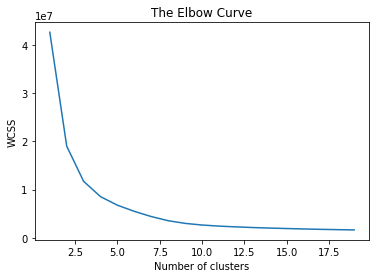

The location of a bend (knee) in the plot is generally considered as an
indicator of the appropriate number of clusters. Our Elbow point is
around cluster size of 5. We will use k=5 to further interpret our
clustering result

### Fit K-Means clustering for k=5<a href="#Fit-K-Means-clustering-for-k=5" class="anchor-link">¶</a>

In \[48\]:

    kmeans = KMeans(n_clusters=5)
    kmeans.fit(scaled_feature)

Out\[48\]:

    KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0)

As a result of clustering, we have the clustering label. Let's put these
labels back into the original numeric data frame.

In \[50\]:

    len(kmeans.labels_)

Out\[50\]:

    30000

In \[53\]:

    data['cluster'] = kmeans.labels_

In \[56\]:

    data.head()

Out\[56\]:

|     | gradyear | gender        | age    | friends | basketball | football | soccer | softball | volleyball | swimming | cheerleading | baseball | tennis | sports | cute | sex | sexy | hot | kissed | dance | band | marching | music | rock | god | church | jesus | bible | hair | dress | blonde | mall | shopping | clothes | hollister | abercrombie | die | death | drunk | drugs | cluster |
|-----|----------|---------------|--------|---------|------------|----------|--------|----------|------------|----------|--------------|----------|--------|--------|------|-----|------|-----|--------|-------|------|----------|-------|------|-----|--------|-------|-------|------|-------|--------|------|----------|---------|-----------|-------------|-----|-------|-------|-------|---------|
| 0   | 2006     | M             | 18.982 | 7       | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 0   | 0    | 0   | 0      | 1     | 0    | 0        | 0     | 0    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     | 0       |
| 1   | 2006     | F             | 18.801 | 0       | 0          | 1        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 1    | 0   | 0    | 0   | 0      | 0     | 0    | 0        | 2     | 2    | 1   | 0      | 0     | 0     | 6    | 4     | 0      | 1    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     | 0       |
| 2   | 2006     | M             | 18.335 | 69      | 0          | 1        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 0   | 0    | 0   | 0      | 0     | 2    | 0        | 1     | 0    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 1     | 0     | 0     | 2       |
| 3   | 2006     | F             | 18.875 | 0       | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 1    | 0   | 0    | 0   | 0      | 0     | 0    | 0        | 0     | 1    | 0   | 0      | 0     | 0     | 0    | 0     | 0      | 0    | 0        | 0       | 0         | 0           | 0   | 0     | 0     | 0     | 0       |
| 4   | 2006     | not disclosed | 18.995 | 10      | 0          | 0        | 0      | 0        | 0          | 0        | 0            | 0        | 0      | 0      | 0    | 1   | 0    | 0   | 5      | 1     | 1    | 0        | 3     | 0    | 1   | 0      | 0     | 0     | 1    | 0     | 0      | 0    | 2        | 0       | 0         | 0           | 0   | 0     | 1     | 1     | 0       |

## Interpreting Clustering Results<a href="#Interpreting-Clustering-Results" class="anchor-link">¶</a>

Let's see cluster sizes first

In \[65\]:

    plt.figure(figsize=(12,7))
    axis = sns.barplot(x=np.arange(0,5,1),y=data.groupby(['cluster']).count()['age'].values)
    x=axis.set_xlabel("Cluster Number")
    x=axis.set_ylabel("Number of Students")

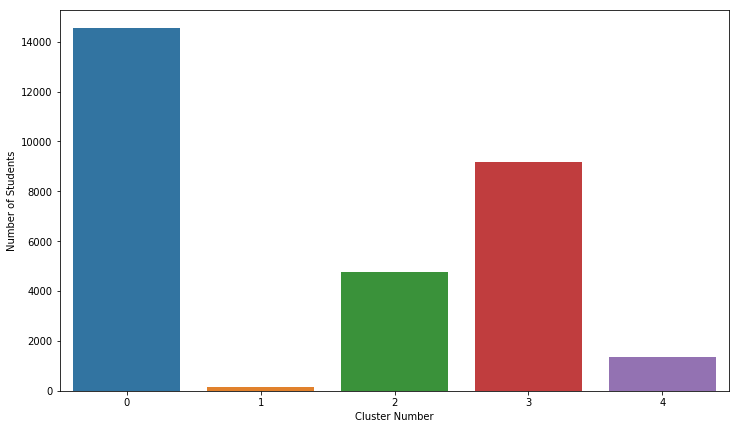

From the above plot we can see that cluster 0 is the largest and cluster
1 has fewest teen students

Let' see the number of students belonging to each cluster

In \[75\]:

    size_array = list(data.groupby(['cluster']).count()['age'].values)
    size_array

Out\[75\]:

    [14536, 166, 4784, 9176, 1338]

let's check the cluster statistics

In \[85\]:

    data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

Out\[85\]:

|         | basketball | football | soccer   | softball | volleyball | swimming | cheerleading | baseball | tennis   | sports   | cute     | sex      | sexy     | hot      | kissed   | dance    | band     | marching | music    | rock     | god      | church   | jesus    | bible    | hair     | dress    | blonde   | mall     | shopping | clothes  | hollister | abercrombie | die      | death    | drunk    | drugs    |
|---------|------------|----------|----------|----------|------------|----------|--------------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|----------|-----------|-------------|----------|----------|----------|----------|
| cluster |            |          |          |          |            |          |              |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |          |           |             |          |          |          |          |
| 0       | 0.223308   | 0.229018 | 0.191387 | 0.121423 | 0.109177   | 0.115094 | 0.085718     | 0.091566 | 0.080627 | 0.127683 | 0.272565 | 0.206728 | 0.127408 | 0.108214 | 0.096313 | 0.362548 | 0.269813 | 0.035498 | 0.680930 | 0.221863 | 0.409741 | 0.200812 | 0.091428 | 0.018368 | 0.395707 | 0.095487 | 0.080696 | 0.218148 | 0.296574 | 0.135182 | 0.054554  | 0.039970    | 0.177353 | 0.101679 | 0.084067 | 0.064461 |
| 1       | 0.313253   | 0.253012 | 0.283133 | 0.210843 | 0.228916   | 0.216867 | 0.180723     | 0.138554 | 0.090361 | 0.126506 | 0.457831 | 0.222892 | 0.186747 | 0.132530 | 0.168675 | 0.463855 | 0.361446 | 0.060241 | 0.692771 | 0.192771 | 0.632530 | 0.240964 | 0.090361 | 0.006024 | 0.674699 | 0.174699 | 0.138554 | 0.325301 | 0.596386 | 0.198795 | 0.126506  | 0.150602    | 0.216867 | 0.168675 | 0.126506 | 0.054217 |
| 2       | 0.327968   | 0.283027 | 0.275920 | 0.243311 | 0.182901   | 0.156982 | 0.137542     | 0.127090 | 0.094064 | 0.151965 | 0.392768 | 0.183110 | 0.164089 | 0.149875 | 0.115385 | 0.504599 | 0.316054 | 0.045778 | 0.783445 | 0.277383 | 0.544732 | 0.321697 | 0.145694 | 0.023829 | 0.445443 | 0.131271 | 0.103261 | 0.315635 | 0.441054 | 0.168060 | 0.095945  | 0.075460    | 0.176003 | 0.124373 | 0.086747 | 0.059156 |
| 3       | 0.287816   | 0.266674 | 0.241173 | 0.166412 | 0.166957   | 0.149847 | 0.108217     | 0.109525 | 0.093723 | 0.153226 | 0.340562 | 0.224935 | 0.143091 | 0.131866 | 0.105166 | 0.460985 | 0.339255 | 0.045554 | 0.797188 | 0.258391 | 0.481909 | 0.262969 | 0.120205 | 0.023540 | 0.435266 | 0.117371 | 0.119551 | 0.263840 | 0.373474 | 0.155405 | 0.070619  | 0.048823    | 0.195292 | 0.125000 | 0.089799 | 0.056670 |
| 4       | 0.382661   | 0.296712 | 0.239910 | 0.257848 | 0.195815   | 0.147235 | 0.203288     | 0.135277 | 0.091928 | 0.141256 | 0.481315 | 0.224215 | 0.190583 | 0.206278 | 0.112855 | 0.571001 | 0.284753 | 0.041106 | 0.791480 | 0.257848 | 0.650224 | 0.399103 | 0.162930 | 0.031390 | 0.514200 | 0.154709 | 0.135277 | 0.422272 | 0.480568 | 0.169656 | 0.130792  | 0.089686    | 0.205531 | 0.133782 | 0.117339 | 0.047833 |

The cluster center values shows each of the cluster centroids of the
coordinates. The row referes to the five clusters,the numbers across
each row indicates the cluster’s average value for the interest listed
at the top of the column. Positive values are above the overall mean
level.